# Cardio Good Fitness Case Study 
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

**Objective**
- Identify differences between customers of each product
- Explore relationships between the difference attributes of customers

### Import required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 


### Load Dataset:

In [2]:
#Load the Cardio Dataset

mydata = pd.read_csv('data/CardioGoodFitness.csv')

### Understanding the structure of Data:

In [3]:
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
mydata.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [5]:
mydata.shape

(180, 9)

 **Observations:** There are 180 observations of 9 columns in the dataset**

In [3]:
mydata.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

 **Observations:**

1. Columns Product, Gender and Marital Status are of string datatype 
2. Columns Age, Education, Usage, Fitness, Income and Miles are of integer (numerical) datatype

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations:**

1. There are 6 columns of integer type
1. There are 3 objects of string type
1. The dataset is of approximately 12.8 kb in size
1. There are 180 rows


In [8]:
mydata.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [3]:
mydata.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
mydata.describe(include ='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observations:** 

**A. AGE:**

    1. Customers between 18 and 50 years of age are using treadmill
    2. Average age is 28.78 years
    3. As there is not much difference in mean and median, the skewness in data is minimal

**B. INCOME:**

    1. Customers with income range of USD 29,500 to USD 104,500 are using treadmill
    2. Considering the difference between mean and median & mean being greater than median, the data is right skewed
    4. Standard deviation is very high

**C. MILES:**

    1. Customers are expected to run between 21 to 360 miles per week
    2. Considering the difference between mean and median & mean being greater than median, the data is right skewed
    3. Standard deviation is very high

#### Count based on model

**Observations:** 

1. TM195 is the most sold model
2. TM798 is the least sold model

#### Count based on Gender

In [4]:
mydata.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**Observations:** 
1. Male Customers are buying more treadmills compared to Female Customers

#### Count based on Marital Status

In [13]:
mydata.MaritalStatus.value_counts()   

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**Observations:**  
1. Partnered Customers are buying more treadmills compared to Single Customers

#### Understanding data for Product Code TM195

In [16]:
mydata[mydata['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


**Observations:**

1. A total of 80 customers purchased TM195 model 
2. Average age of customer is 28.5 (Median: 26) (Range: 18 - 50)
3. Data is right skewed.
4. Average number of years of Education for customers is 15 (Median: 16)
3. Customer wants to use the treadmill at least 3 times per week
4. Customers are expected to run is 82.78 miles per week (Median: 85)
5. Average income and median is approximately USD 46,000 

#### Understanding data for Product Code TM498

In [3]:
mydata[mydata['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


**Observations:**

1. A total of 60 customers purchased TM498 model
2. Average age of customer is 28.9 (Median: 26) (Range: 19-48)
3. Data is right skewed.
4. Average number of years of Education for customers is 15 (Median: 16)
5. Customer wants use the treadmill at least 3 times per week
6. Customers are expected to run is 60 miles per week (Median: 85)
7. Average income is USD 46,000 (Median: USD 49,459)

#### Understanding data for Product Code TM798

In [4]:
mydata[mydata['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


**Observations:**

1. A total of 40 customers purchased TM798 model
2. Average age of customer is 29 (Median: 27) (Range: 22-48)
3. Average number of years of Education for customers is 17 (Median: 18)
4. Customer wants to use the treadmill at least 4-5 times per week
5. Customers are expected to run are 166 miles per week (Median: 160)
6. Average income is USD 75,000 (Median: USD 76,000)

## Univeriate Analysis:

### Analysis Based on Age

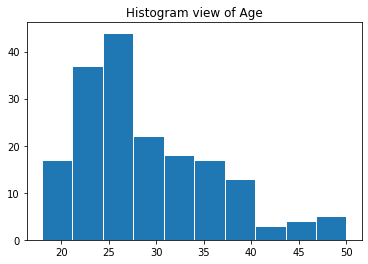

In [3]:
# Historam for age
plt.hist(mydata.Age, edgecolor = 'white')
plt.title("Histogram view of Age")
plt.show()

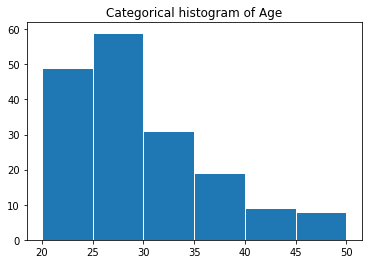

In [3]:
# Distribute data in Age groups
bins = [20,25,30,35,40,45,50]
plt.hist(mydata.Age,bins,edgecolor = 'white')
plt.title("Categorical histogram of Age")
plt.show()

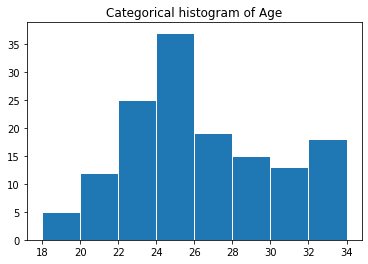

In [3]:
# Distribute data in Age groups
bins = [18,20,22,24,26,28,30,32,34]
plt.hist(mydata.Age,bins,edgecolor = 'white')
plt.title("Categorical histogram of Age")
plt.show()

**Observations:**

1. Most customers are in the age range of 22 - 32
2. Further classification reveals that most customers are of ages between 24 and 26 years, followed by customers from age group 22 and 24 years

### Analysis based on Income

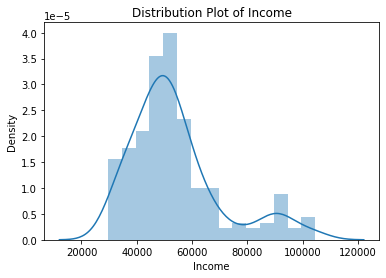

In [4]:
# Visualisation of income range
sns.distplot(mydata.Income)
plt.title("Distribution Plot of Income")
plt.show()

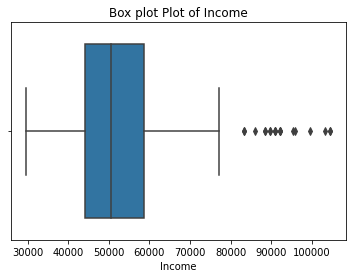

In [3]:
# boxplot view of income
sns.boxplot(mydata.Income)
plt.title("Box plot Plot of Income")
plt.show()

**Observations:**

1. There are two peaks shown by the income range of people
2. Data is right skewed and shows outliers on the right
3. Most Customers fall in range of USD 45,000 - USD 60,000
4. Outliers are observed above USD 85,000

### Analysis based on Gender

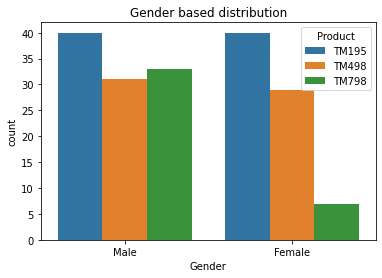

In [3]:
# Number of records per gender and product model
sns.countplot(mydata.Gender, hue=mydata.Product)
plt.title('Gender based distribution')
plt.show()

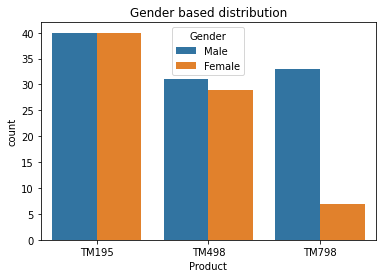

In [4]:
# Number of records per model and per gender
sns.countplot('Product', hue='Gender',data=mydata)
plt.title('Gender based distribution')
plt.show()

**Observations:**

1. Number of male customers purchasing treadmill is more than Female Customers
2. TM798 is the least popular model of treadmill in Female Customers
3. TM195 is equally preferred model of treadmill in both male and Female Customers

### Analysis based on Marital Status

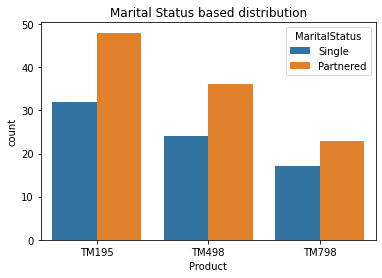

In [3]:
# Number of records per model and per Marital Status
sns.countplot(mydata.Product, hue=mydata.MaritalStatus)
plt.title('Marital Status based distribution')
plt.show()

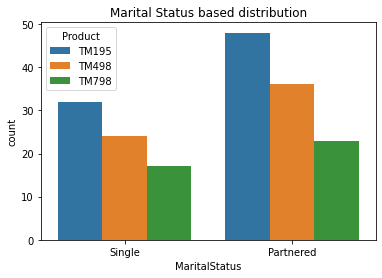

In [3]:
# Number of records per model and per Marital Status
sns.countplot(mydata.MaritalStatus, hue=mydata.Product)
plt.title('Marital Status based distribution')
plt.show()

**Observations:**

1. Partnered Customers have purchased treadmill more than Single Customers
2. TM195 model is popular in both Marital Statuses


### Analysis based on Usage

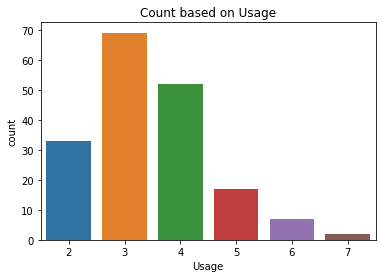

In [26]:
# Number of records based on usage per week
sns.countplot(mydata.Usage)
plt.title('Count based on Usage')
plt.show()

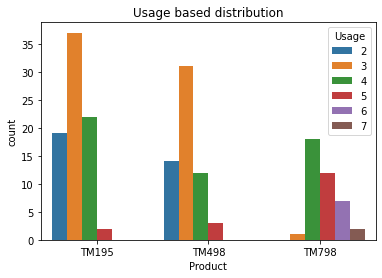

In [3]:
# Number of records per model and for number of times of Usage
sns.countplot(mydata.Product, hue=mydata.Usage)
plt.title('Usage based distribution')
plt.show()

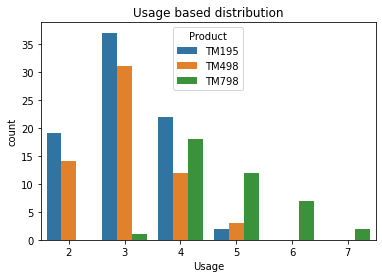

In [3]:
# Number of records per model and per Usage
sns.countplot(mydata.Usage, hue=mydata.Product)
plt.title('Usage based distribution')
plt.show()

**Observations:**

1. Most customers use Treadmill at least 3 times per week
2. TM195 is most popular amongst active customers
3. Few customers using TM798 Model use the treadmill for 7 times in a week

### Analysis based on Fitness Level

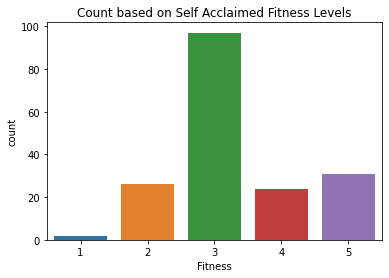

In [4]:
# Number of records per Fitness
sns.countplot(mydata.Fitness)
plt.title('Count based on Self Acclaimed Fitness Levels')
plt.show()

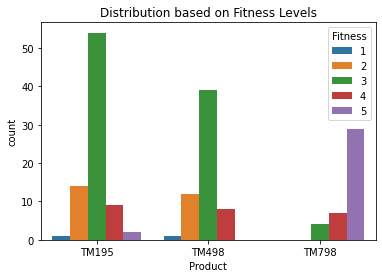

In [3]:
# Number of records per model and for fitness rating
sns.countplot(mydata.Product, hue=mydata.Fitness)
plt.title('Distribution based on Fitness Levels')
plt.show()

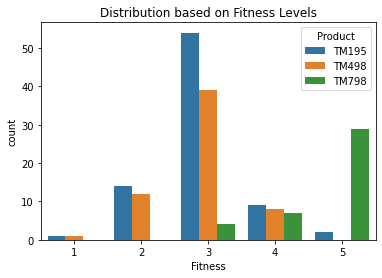

In [31]:
# Number of records per model and for fitness rating
sns.countplot(mydata.Fitness, hue=mydata.Product)
plt.title('Distribution based on Fitness Levels')
plt.show()

**Observations:**

1. Most customers have rated themselves at Level 3 of Fitness levels
2. TM195 is most popular amongst customers at Level 3
3. Almost all Customers at Fitness Level 5 use TM798 model

### Analysis based on Education

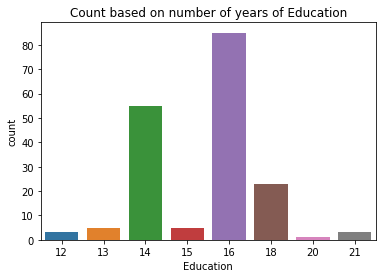

In [32]:
# Distribution based on number of years of education
sns.countplot(mydata.Education)
plt.title("Count based on number of years of Education")
plt.show()

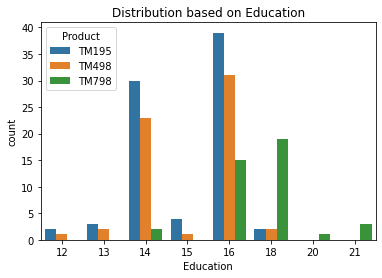

In [3]:
# Number of records per model for customer segments based on the number of years of education
sns.countplot(mydata.Education, hue=mydata.Product)
plt.title('Distribution based on Education')
plt.show()

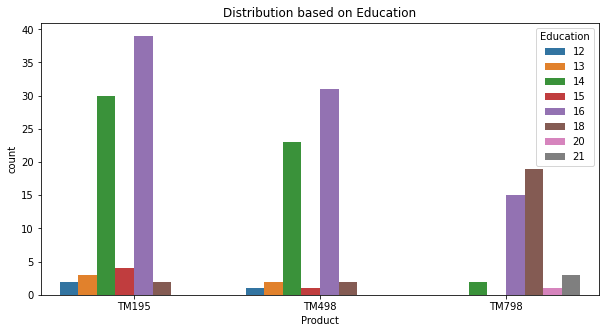

In [3]:
# Number of records per model for customer segments based on the number of years of education
plt.figure(figsize=(10,5))
sns.countplot(mydata.Product, hue=mydata.Education)
plt.title('Distribution based on Education')
plt.show()

**Observations:**

1. Most Customers using treadmill have 16 to 18 years of Education
2. Customers with more than 20 years of education have only purchased TM798 Model
3. TM798 is most preferred by the customer with 18 years of education

### Analysis based on Miles planned per week

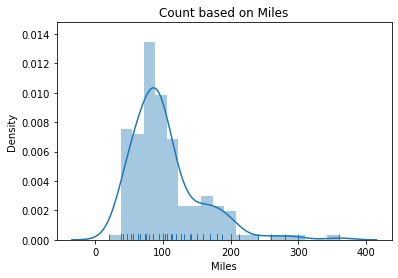

In [4]:
# Distribution plot of Miles with RUG and KDE
sns.distplot(mydata.Miles, rug=True)
plt.title('Count based on Miles')
plt.show()

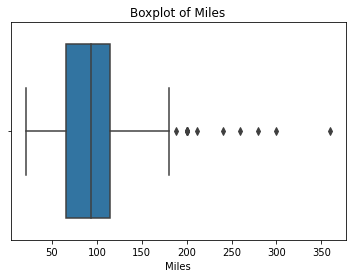

In [3]:
# Boxplot view of data based on miles
sns.boxplot(mydata.Miles)
plt.title("Boxplot of Miles")
plt.show()

**Observations:**

1. Outliers are seen on the higher values 
2. Customers are planning to run more than 180 miles per week



In [4]:
# List the data where miles are greater than 180
mydata[mydata['Miles'] > 180]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,TM195,24,Female,16,Partnered,5,5,44343,188
84,TM498,21,Female,14,Partnered,5,4,34110,212
142,TM798,22,Male,18,Single,4,5,48556,200
148,TM798,24,Female,16,Single,5,5,52291,200
152,TM798,25,Female,18,Partnered,5,5,61006,200
155,TM798,25,Male,18,Partnered,6,5,75946,240
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200


## Bivariate Analysis:

#### Average age for each model

In [3]:
mydata.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

#### Average Income for each model

In [4]:
mydata.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

#### Average miles per model

In [3]:
mydata.groupby('Product')['Miles'].mean()

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64

#### Average of number of years of education for each model

In [3]:
mydata.groupby('Product')['Education'].mean()

Product
TM195    15.037500
TM498    15.116667
TM798    17.325000
Name: Education, dtype: float64

### Analysis of Miles based on Age

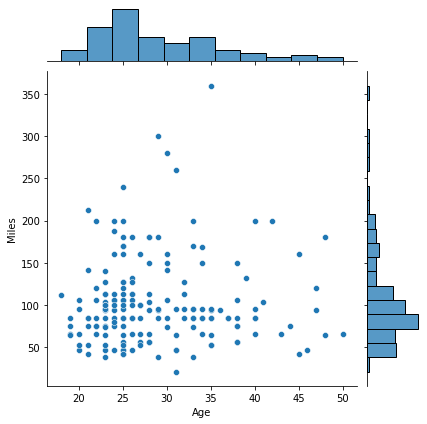

In [3]:
sns.jointplot(x = 'Age' , y = 'Miles', data = mydata)
plt.show()

**Observations:**

There is no definite correlation observed between Age and Miles

### Analysis of Income based on Age

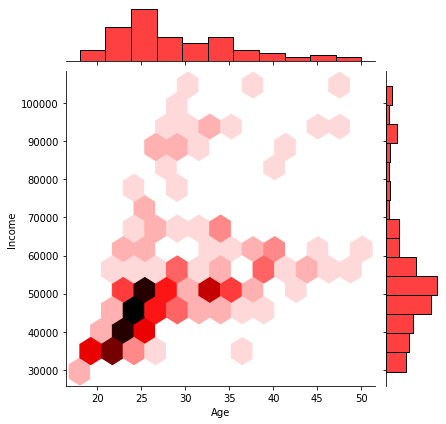

In [3]:
sns.jointplot(x = 'Age' , y = 'Income', data = mydata, color='red', kind ='hex')
plt.show()

**Observations:**

Income increases with the age, depicting positive correlation.

### Analysis of Miles based on Income

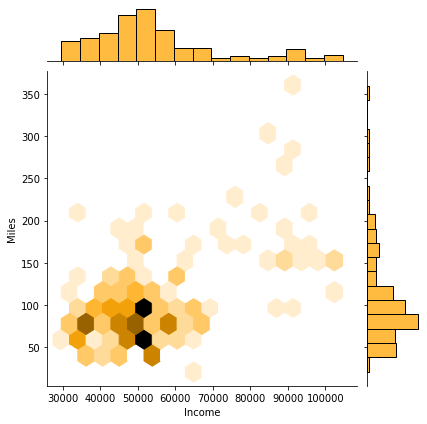

In [3]:
sns.jointplot(x = 'Income' , y = 'Miles', data = mydata, color='orange', kind ='hex')     
plt.show()

**Observations:**

With increase in Customer Income a slight increase is observed in Miles

### Analysis of Income based on Gender

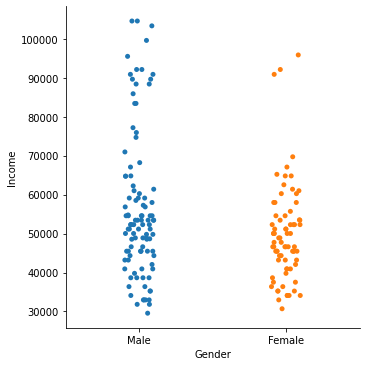

In [4]:
sns.catplot(x = 'Gender' , y = 'Income', data = mydata)
plt.show()

**Observations:**

Male Customers have higher income range, when compared to Female Customers

### Analysis of Miles based on Gender

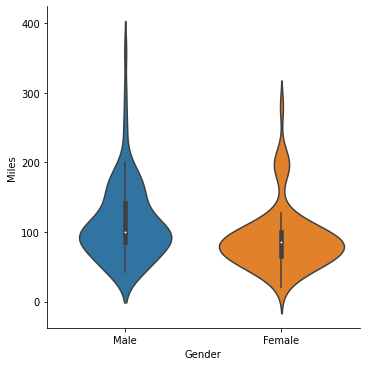

In [5]:
sns.catplot(x = 'Gender' , y = 'Miles', data = mydata, kind = 'violin')
plt.show()

**Observations:**

Male Customers plan to run more miles, when compared to Female Customers

### Analysis of Usage based on Gender

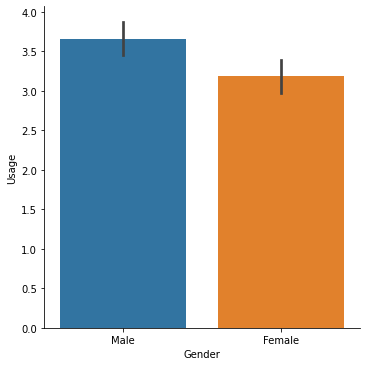

In [3]:
sns.catplot(x = 'Gender' , y = 'Usage', data = mydata, kind = 'bar')
plt.show()

Observations:

Male Customers show higher usage per week, when compared to Female Customers

### Analysis of Income based on Marital Status

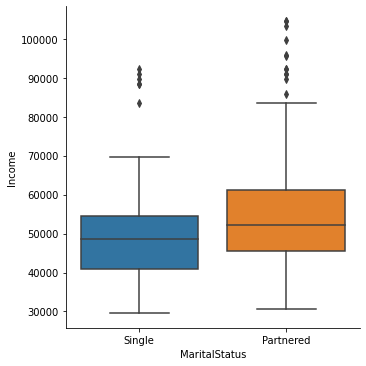

In [4]:
sns.catplot(x = 'MaritalStatus' , y = 'Income', data = mydata, kind = 'box')
plt.show()

Observations:

Partnered Customers have higher income range, when compared to Single Customers

### Analysis of Miles based on Marital Status

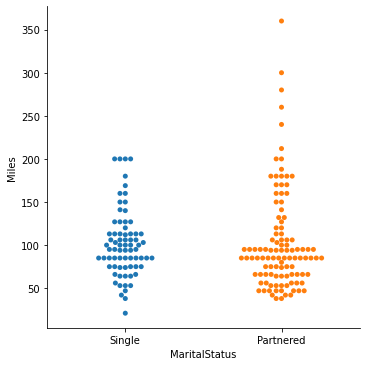

In [3]:
sns.catplot(x = 'MaritalStatus' , y = 'Miles', data = mydata, kind = 'swarm')
plt.show()

Observations:

Partnered Customers plan to run more miles, when compared to Single Customers

## Multivariate Analysis:

### Multicolumn catplot of Marital Status showing Gender based data compared to Income

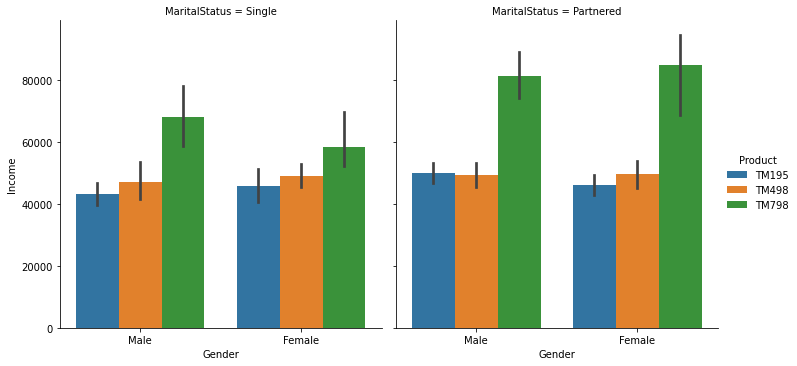

In [3]:
sns.catplot( x = "Gender", y = 'Income', hue = 'Product', col = 'MaritalStatus',data = mydata, kind = 'bar')

**Observations:**

1. TM798 leads all charts across Customer Segments
2. Single Female Customers have purchased more of TM195 and TM498 models compared to Single Male Customers
3. Single Male Customers are more than Single Female Customers 
4. Partnered Female Customers are more than Partnered Male Customers

### Pointplot showing sales based on Education and Income

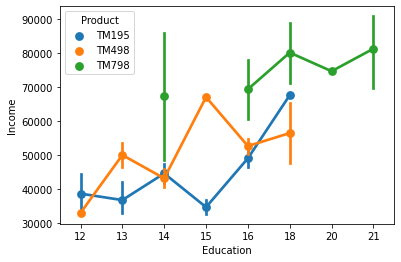

In [3]:
sns.pointplot(x=mydata["Education"],y=mydata["Income"],hue=mydata['Product']) 
plt.show()

**Observation:-**

   1. Customers with higher education has higher income range
   2. TM798 has higher income and higher education

### Correlation between Numerical columns of dataset

In [4]:
# Correlation of numerical values in dataset
mydata.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


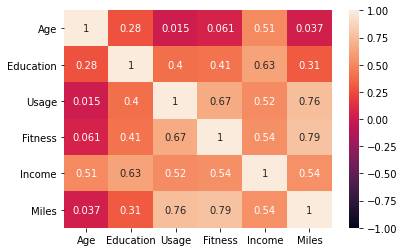

In [3]:
# Heatmap for the correlation of numerical values in dataset
sns.heatmap(mydata.corr(), annot=True, vmin=-1, vmax = 1) 
plt.show()

**Observations:**

1. Miles and Usage show high correlation
2. Fitness and Miles show high correlation
3. Education and Income show notable correlation
4. Usage and Fitness show notable correlation
5. Income and Usage show little correlation

#### Pairplot of all numerical values with clasification of Product

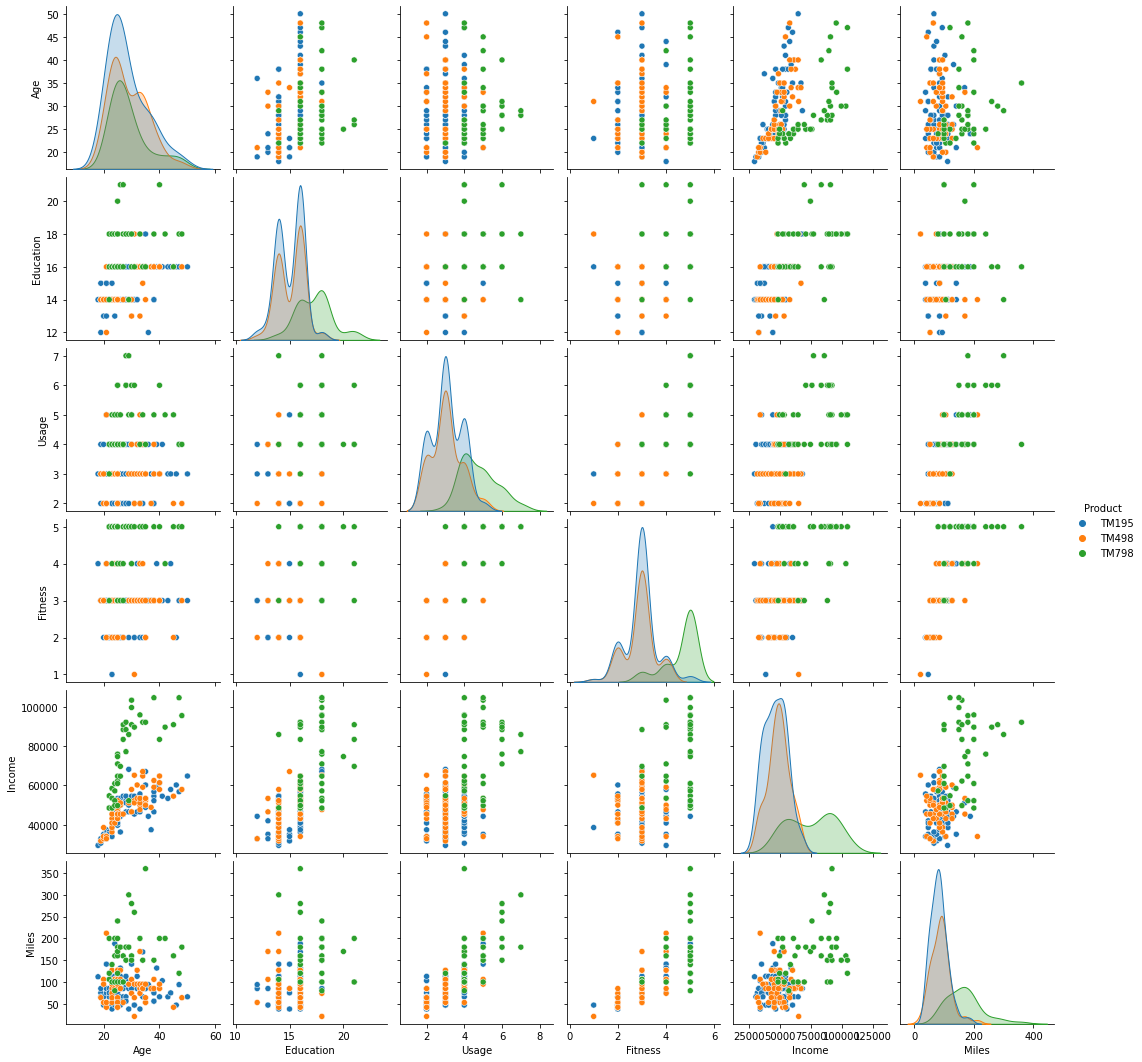

In [3]:
sns.pairplot(mydata, hue='Product')
plt.show()

#### Pairplot of all numerical values using KDE

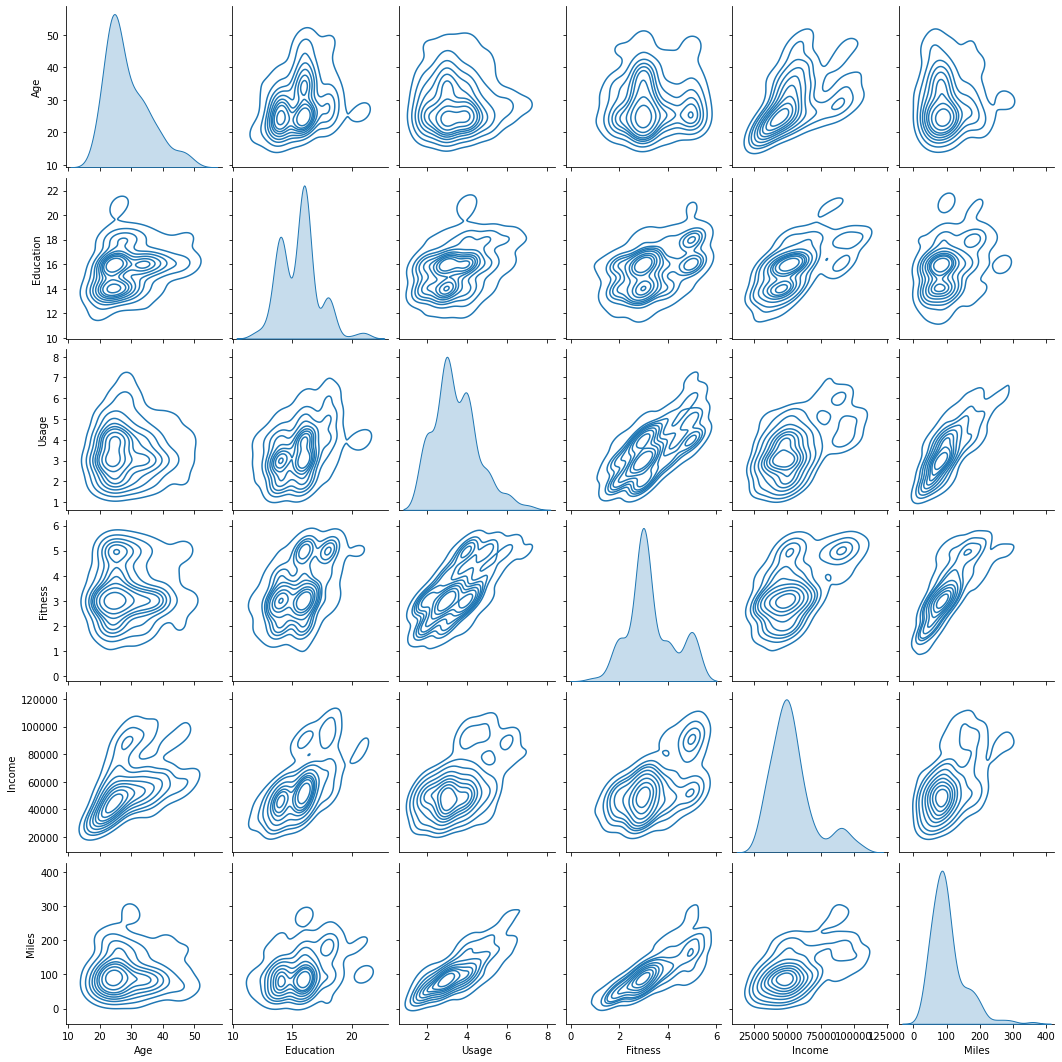

In [3]:
sns.pairplot(mydata, kind='kde')
plt.show()

## Conclusion (Important Observations):

1. TM195 is most sold model, accounting for 44.44% of total sales.
2. 57.78% of Customers are Male Customers, which is more than the Female Customers.
3. Partnered customers account for 59.44% of sales.
4. Most customers are between 22 to 26 years of age.
5. TM798 is most preferred by customers with higher income range.

## Recommendations:

1. TM195 and TM498 are popular with customers in USD 45,000 and USD 60,0000 income range and can be promoted as affordable models for these income groups
2. TM798 should be branded as Premium Model and marketed among high income groups and specific customer categories. Promotional programs can be run for upgrades from other models.
3. Rewards programs can be launched to promote per week of usage. Gamification based on points can also be introduced, with weekly leader boards.
4. Special promotions to be run to target Female Customers, for instance:
    1. Discounts on Women's Day and similar celebrated ocassions
    2. Purchase offers using Credit Card or Bank Reward points
    3. Free additional gifts and hampers from partners
5. Market research can be conducted to check the feasibility of attracting customers outside the age range of 18-35.

Kshitij